# Generating a set of magnetic sources

Notebook to generate a model.

## Import libraries

In [1]:
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from IPython.display import Markdown as md
from IPython.display import display as dp
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism
from fatiando.gravmag import sphere, prism, polyprism

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'synthetic_model.ipynb'

## Importing my package

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as func

## Loading 2D grid properties

In [6]:
with open('data/regular_grid.pickle') as f:
        regular = pickle.load(f)

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

## List of saved files

In [8]:
saved_files = []

## Observation area

In [9]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (regular['area'][1], regular['area'][0],regular['area'][3],regular['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


## Creating a model  

In [11]:
model_multi = dict()

### Main field direction

In [12]:
inc_gf , dec_gf = (-40.,-22.) ## https://geomag.bgs.ac.uk/data_service/models_compass/wmm_calc.html no RJ 

In [13]:
model_multi['main_field'] = (inc_gf,dec_gf)

#### Setting bounds of a polygon 

<IPython.core.display.Javascript object>


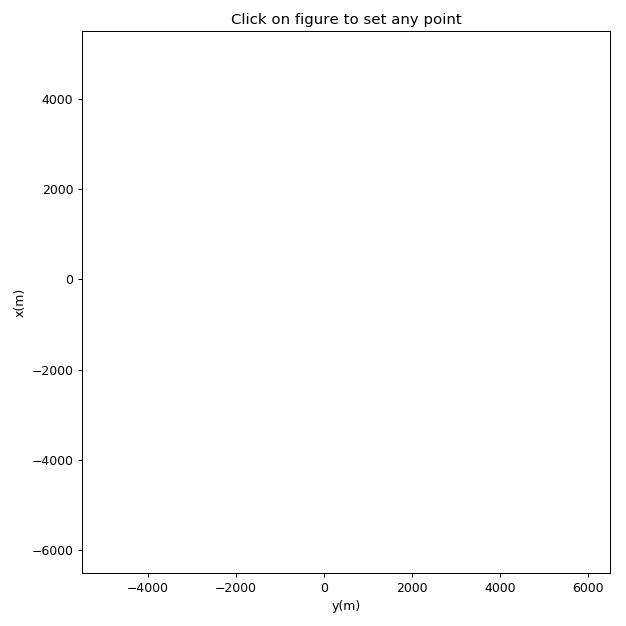

In [14]:
% matplotlib notebook
fig = plt.figure(figsize=(7,7), tight_layout=True)

ax = fig.add_subplot(111)
ax.set_title('Click on figure to set any point')
ax.axis([regular['y'].min(), regular['y'].max(), regular['x'].min(), regular['x'].max()])
ax.set_ylabel('x(m)')
ax.set_xlabel('y(m)')


line, = ax.plot([], [])
line.figure.canvas.draw()
x = []
y = []
plotx = []
ploty = []
def pick(event):
    if event.inaxes != ax.axes:
        return 'It must be any point over de area '
    x.append(event.ydata)
    y.append(event.xdata)
    plotx.append(event.xdata)
    ploty.append(event.ydata)
    line.set_color('r')
    line.set_marker('o')
    line.set_linestyle('')
    line.set_data(plotx,ploty)
    line.figure.canvas.draw()

line.figure.canvas.mpl_connect('button_press_event', pick)

plt.show()


In [15]:
print x

[]


In [16]:
print y

[]


## Magnetization Polygonal prism

In [17]:
model_multi['m_Rpp'] = 4.
model_multi['inc_R'] = -25.
model_multi['dec_R'] = 30.

mag_tot_Rpp = ang2vec(model_multi['m_Rpp'],
                  model_multi['inc_R'],
                  model_multi['dec_R'])

model_multi['magnetization_pp'] = mag_tot_Rpp

### Vertices of a Polygonal prism-1

In [18]:
model_multi['x1_verts'] = [-120.86173387456893, 217.88504245497916, -139.68099922621059, -1005.3672054017161, -2002.788269038715, -3019.0285980273529, -3884.7148042028603, -4204.6423151807649, -3809.4377427962945, -2360.3543107199021, -1494.6681045443956, -666.62042907216983, -120.86173387456893]
model_multi['y1_verts'] = [-1475.5336403581159, -822.01437309183802, -227.90594830431655, -386.33486158098731, -623.97823149599935, -604.17461733641267, -227.90594830431655, -1020.0505146876794, -1594.3553253156206, -1574.5517111560348, -1297.3011129218594, -1396.3191837197774, -1475.5336403581159]

In [19]:
model_multi['z1_top'] = 450.
model_multi['z1_bottom'] = 3150.

In [20]:
model_multi['verts1'] = zip(model_multi['x1_verts'],
                                   model_multi['y1_verts'] )

### Creating a polyprism model

In [21]:
model_multi['polygons'] = [PolygonalPrism(model_multi['verts1'],
                                              model_multi['z1_top'],
                                              model_multi['z1_bottom'],
                                              {'magnetization':mag_tot_Rpp})]

## Magnetization spheres

In [22]:
model_multi['m_Rs'] = 3.
model_multi['inc_R'] = -25.
model_multi['dec_R'] = 30.


mag_tot_Rs = ang2vec(model_multi['m_Rs'],
                  model_multi['inc_R'],
                  model_multi['dec_R'])

model_multi['magnetization_s'] = mag_tot_Rs

### Sphere-1

In [23]:
model_multi['xc1'] = 1800.
model_multi['yc1'] = -1800.
model_multi['zc1'] = 1000.
model_multi['radius1'] = 500.

### Sphere-2

In [24]:
model_multi['xc2'] = 800.
model_multi['yc2'] = 800.
model_multi['zc2'] = 1000.
model_multi['radius2'] = 500.

### Creating a spheres model

In [25]:
model_multi['spheres'] = [Sphere(model_multi['xc1'],
                                         model_multi['yc1'],
                                         model_multi['zc1'],
                                         model_multi['radius1'],
                                         {'magnetization':mag_tot_Rs}),
                            Sphere(model_multi['xc2'],
                                         model_multi['yc2'],
                                         model_multi['zc2'],
                                         model_multi['radius2'],
                                         {'magnetization':mag_tot_Rs})]

In [26]:
theta = np.linspace(0, 2 * np.pi, 100)

## Magnetization of rectangular prisms

In [27]:
model_multi['m_Rp'] = 2.5
model_multi['inc_R'] = -25.
model_multi['dec_R'] = 30.


mag_tot_Rp = ang2vec(model_multi['m_Rp'],
                  model_multi['inc_R'],
                  model_multi['dec_R'])

model_multi['magnetization_p'] = mag_tot_Rp

## Rectangular prisms

### Prism-1

In [28]:
model_multi['x1_max'] = 3200.
model_multi['x1_min'] = 2200.
model_multi['y1_max'] = 3000.
model_multi['y1_min'] = 2300
model_multi['z1_min'] = 450.
model_multi['z1_max'] = 950. 

In [29]:
model_multi['x_verts1'] = [model_multi['x1_max'],model_multi['x1_min'],model_multi['x1_min'],model_multi['x1_max'],model_multi['x1_max']]
model_multi['y_verts1'] = [model_multi['y1_max'],model_multi['y1_max'],model_multi['y1_min'],model_multi['y1_min'],model_multi['y1_max']]

### Prism-2

In [30]:
model_multi['x2_max'] = -2000.
model_multi['x2_min'] = -3000.
model_multi['y2_max'] = 4000.
model_multi['y2_min'] = 2000.
model_multi['z2_min'] = 500.
model_multi['z2_max'] = 2050. 

In [31]:
model_multi['x_verts2'] = [model_multi['x2_max'],model_multi['x2_min'],model_multi['x2_min'],model_multi['x2_max'],model_multi['x2_max']]
model_multi['y_verts2'] = [model_multi['y2_max'],model_multi['y2_max'],model_multi['y2_min'],model_multi['y2_min'],model_multi['y2_max']]

### Creating model

In [32]:
model_multi['prisms'] = [Prism(model_multi['x1_min'],model_multi['x1_max'],
                               model_multi['y1_min'],model_multi['y1_max'],
                               model_multi['z1_min'],model_multi['z1_max'],
                               {'magnetization':mag_tot_Rp}),
                         Prism(model_multi['x2_min'],model_multi['x2_max'],
                               model_multi['y2_min'],model_multi['y2_max'],
                               model_multi['z2_min'],model_multi['z2_max'],
                               {'magnetization':mag_tot_Rp})]

#### Generating .pickle file

In [33]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_multi['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [34]:
file_name = 'data/model_multi.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_multi, f)
    
saved_files.append(file_name)

## Visualization of model projection

<IPython.core.display.Javascript object>


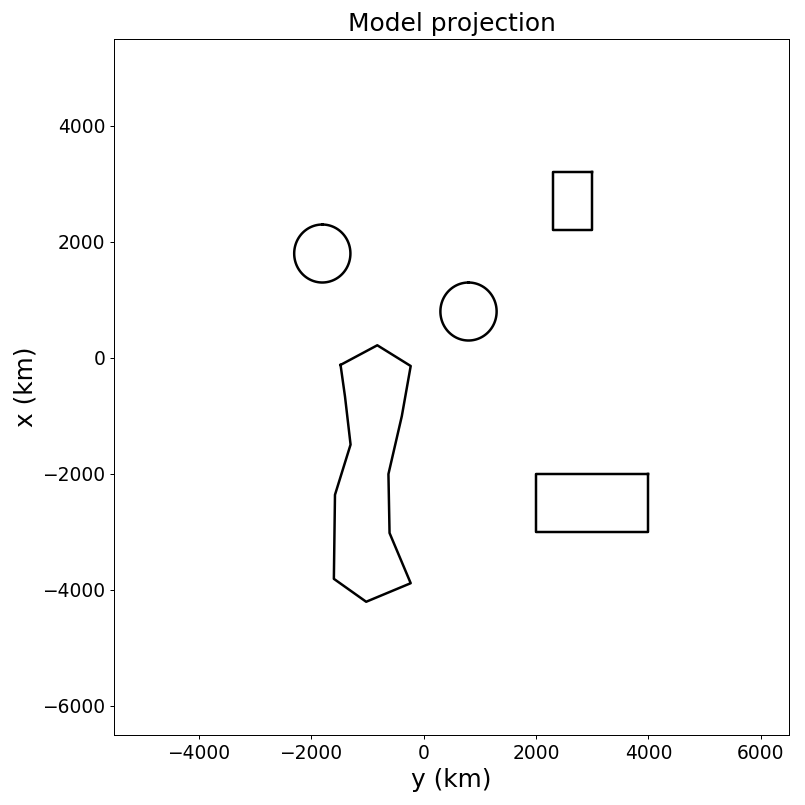

In [35]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.title('Model projection',fontsize=title_font)

plt.plot(model_multi['y1_verts'],model_multi['x1_verts'], 
         color='k',linestyle='-',linewidth=2)

plt.plot(model_multi['y_verts1'],model_multi['x_verts1'], 
         color='k',linestyle='-',linewidth=2)
plt.plot(model_multi['y_verts2'],model_multi['x_verts2'], 
         color='k',linestyle='-',linewidth=2)


plt.plot(model_multi['radius1']*np.sin(theta)+ model_multi['yc1'] ,
         model_multi['radius1']*np.cos(theta)+ model_multi['xc1'], 
         color='k',linestyle='-',linewidth=2)
plt.plot(model_multi['radius2']*np.sin(theta)+ model_multi['yc2'] ,
         model_multi['radius2']*np.cos(theta)+ model_multi['xc2'], 
         color='k',linestyle='-',linewidth=2)

plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.ylim(np.min(airborne['x']),np.max(airborne['x']))
plt.xlim(np.min(airborne['y']),np.max(airborne['y']))
plt.tick_params(labelsize=15)

file_name = 'figs/model_projection'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

#### Saved files

In [36]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  data/model_multi.pickle
2  figs/model_projection.png
